# Vendor Performance Analysis Project
### Notebook 02:- Data Analysis

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
warnings.filterwarnings('ignore')



# Loading the Dataset

In [4]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# EDA of new dataset

In [5]:
# summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


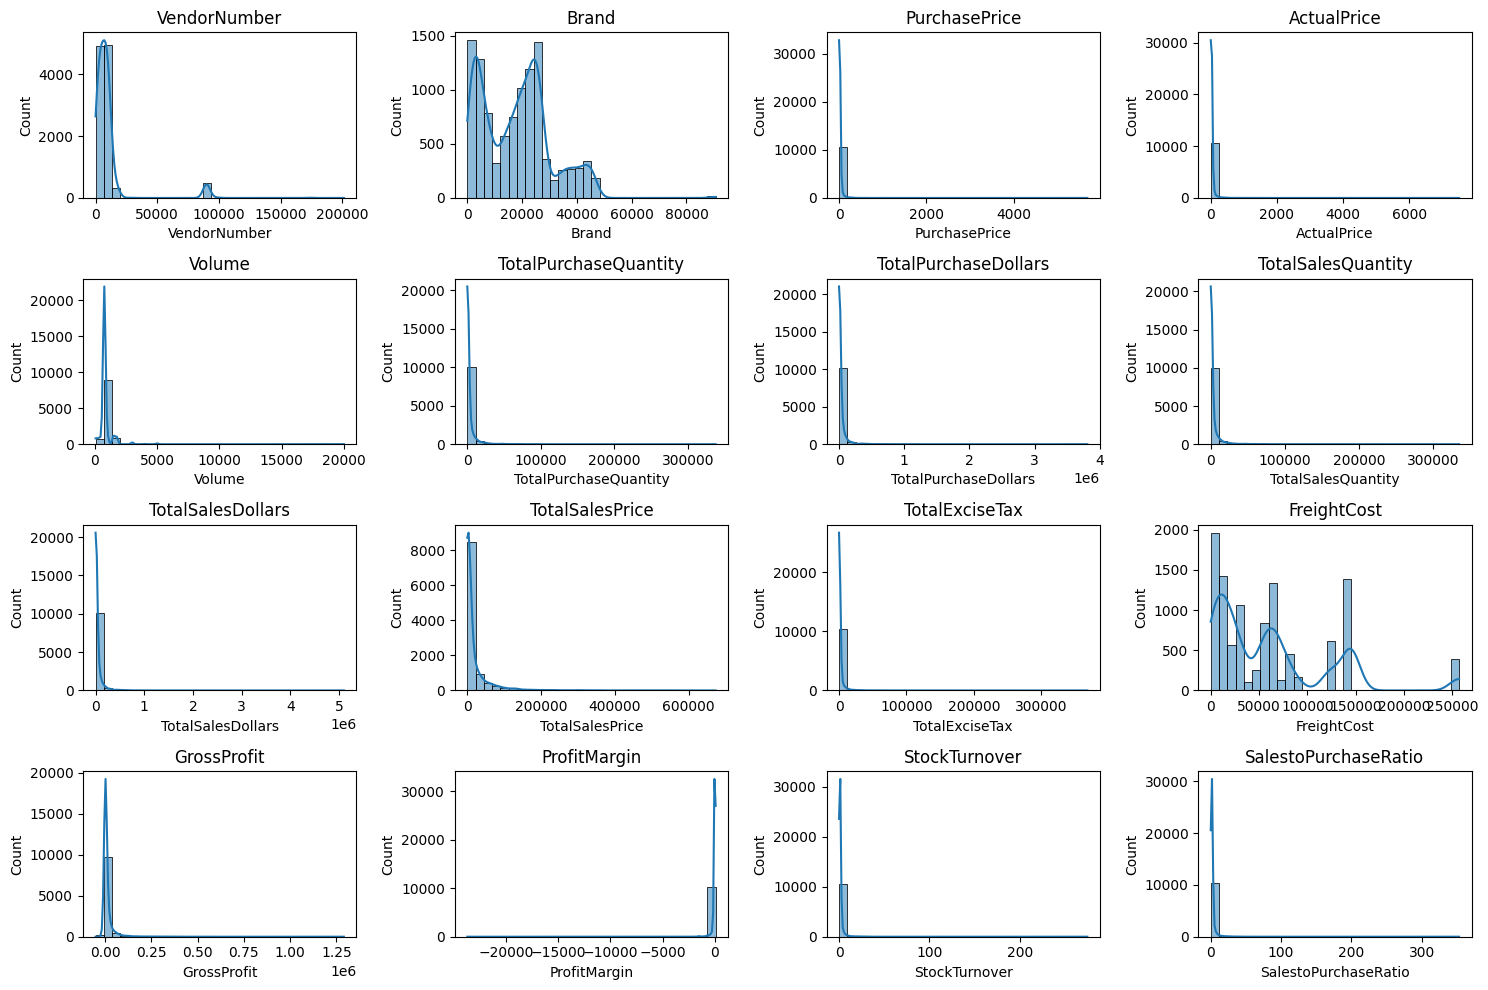

In [11]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins =30)
    plt.title(col)
plt.tight_layout()
plt.show()

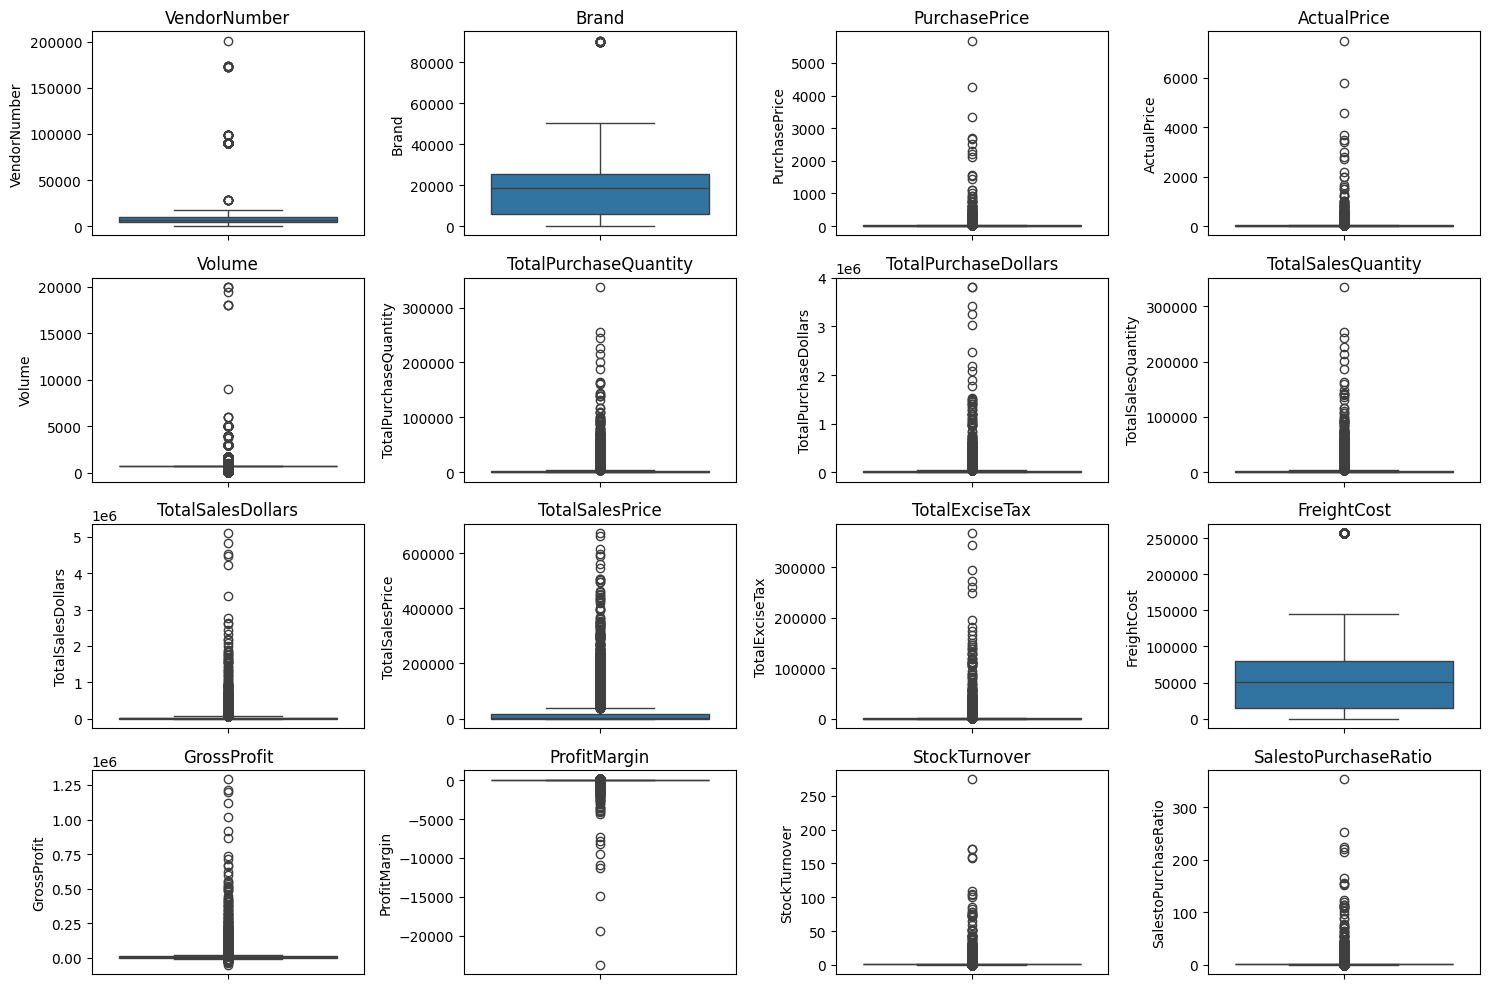

In [12]:
# Outlier Detection with boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights

#### Negative & Zero Values:

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a high costs or selling at discounts lower than the purchase price..
- Profit Margin: Has a minimum of -infinity, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

#### Outliers indicated by High Standard Deviations:

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover : Ranges from 0 to 274.5, implying some products sell extremely fast whileothers remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that productis higher tham purchased quantity due to either sales are being fulfilled from older stock.

In [16]:
# lets filter the data by removing inconsistencies
df=pd.read_sql_query(""" select * from vendor_sales_summary
where GrossProfit > 0 and ProfitMargin > 0 and TotalSalesQuantity > 0""", conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


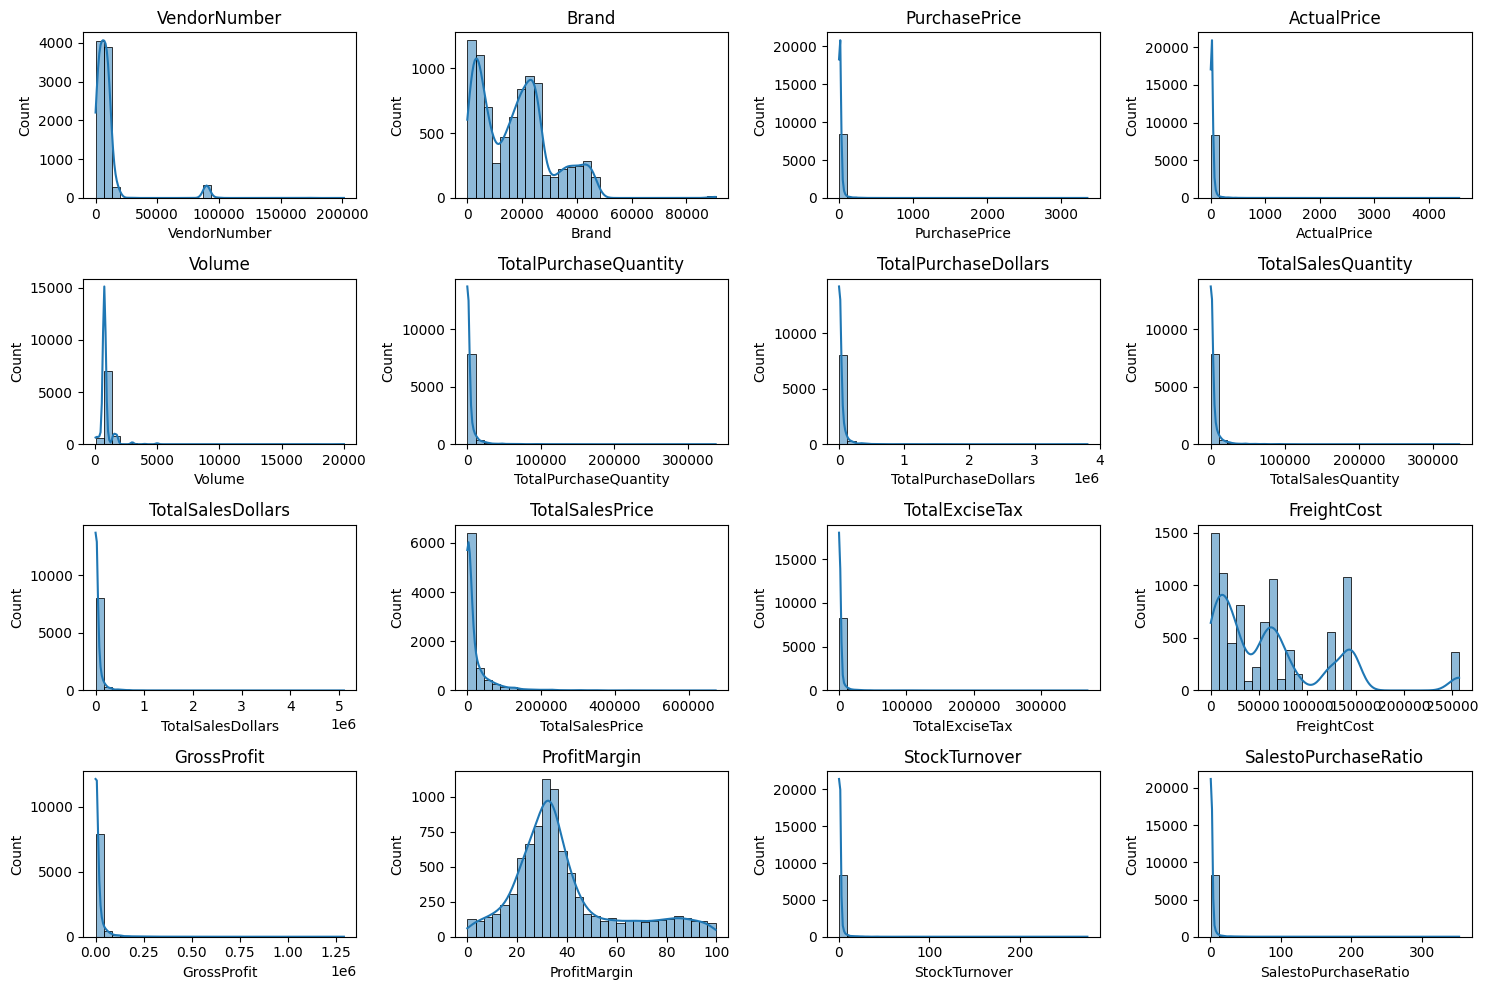

In [17]:
# Distribution Plots for Numerical Columns after cleaning data
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins =30)
    plt.title(col)
plt.tight_layout()
plt.show()

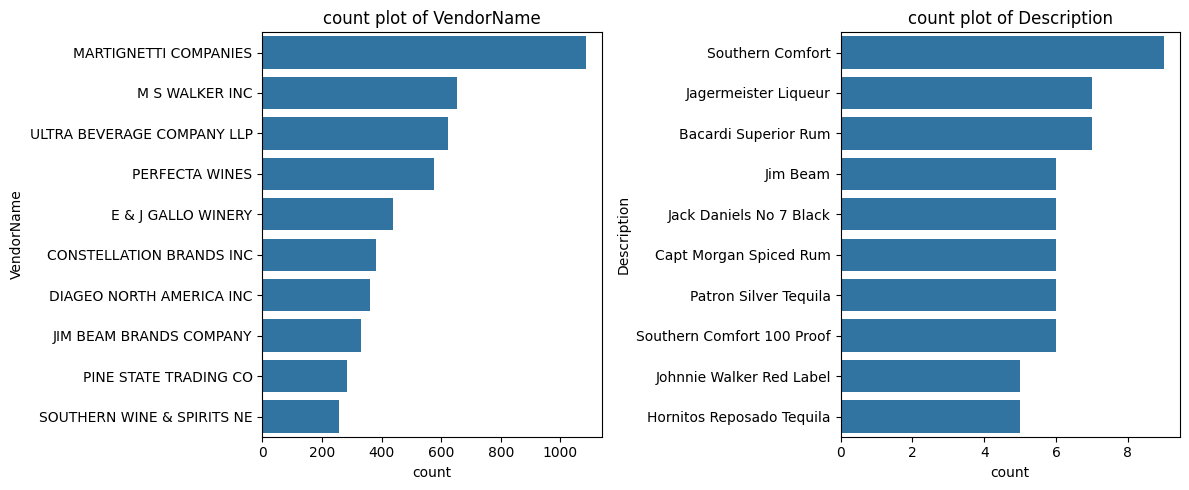

In [19]:
# Count Plots for Categoricalcolumns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

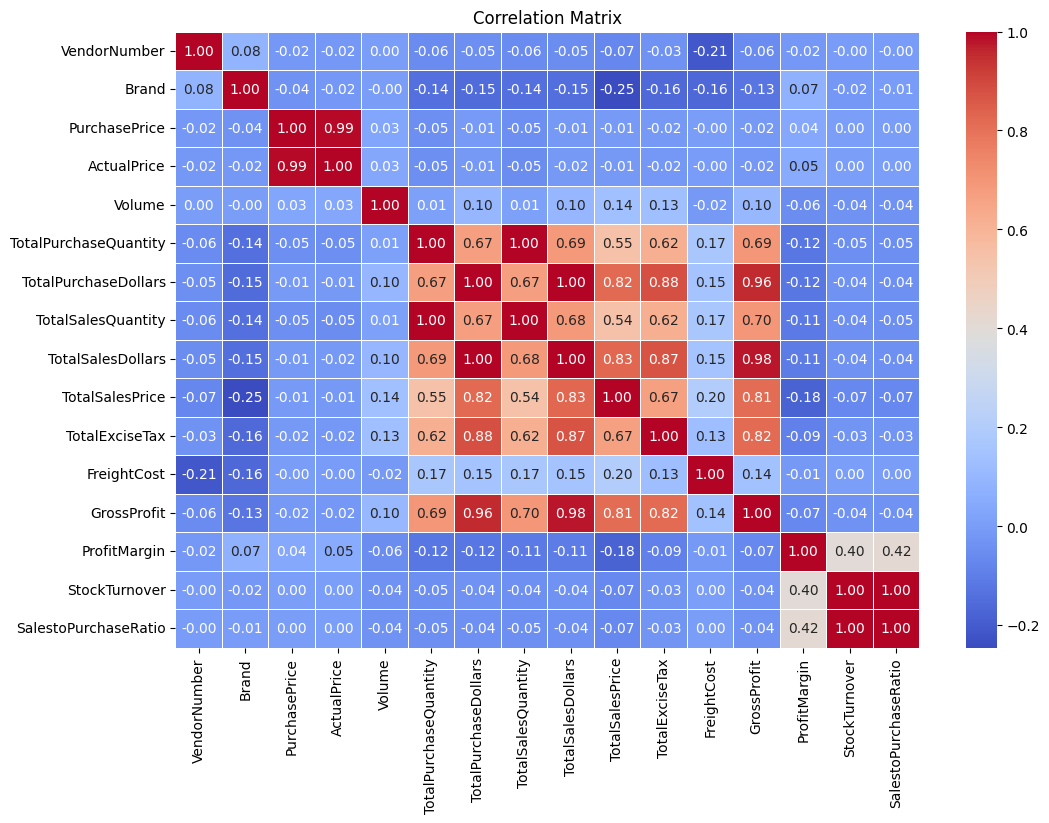

In [23]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt = ".2f", cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Correlation Insights

- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity(0.999), confirming efficient inventory turnover
- Stock Turnover has weak negative correlations with both GrossProfit (-0.038) and Profit Margin(-0.055) indicating that faster turnover does not necessarily result in higher profitability.


# Data Analysis

**Identify Brands that need Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.**

In [25]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [27]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [28]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance['ProfitMargin'] >= high_margin_threshold)]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


**Which vendors and brands demonstrate the highest sales performance?**

In [30]:
def format_dollars(value):
    if value >=1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value / 1_000:.2f}k"
    else:
        return str(value)

In [29]:
# Top vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [31]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

**Which Vendors contribute the most to total purchase dollars?**

In [32]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalSalesDollars':'sum',
    'GrossProfit':'sum',
    'TotalPurchaseDollars':'sum'
}).reset_index()

In [43]:
vendor_performance['PurchaseContribution%'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()) * 100

In [44]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [45]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,16.30
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,8.30
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,7.76
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,7.64
6,BACARDI USA INC,24.85M,7.42M,17.43M,5.67
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,4.97
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,4.31
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,3.93
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,3.63
53,M S WALKER INC,14.71M,4.94M,9.76M,3.18


**How much of total procurement is dependent on the top vendors?**

In [46]:
print(f"Total Purchase Contribution of Top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of Top 10 vendors is 65.69 %


**Does purchasing in bulk reduce the unit price and what is the original purchase volume for cost savings?**

In [47]:
df['unitpurchaseprice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [48]:
df['Ordersize']  = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small","Medium","Large"])

In [49]:
df.groupby('Ordersize')['unitpurchaseprice'].mean()

Ordersize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: unitpurchaseprice, dtype: float64

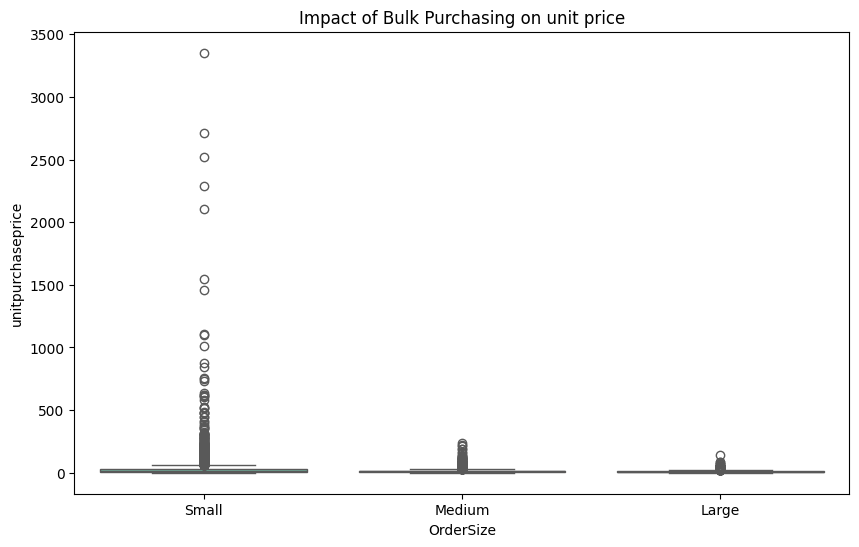

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x="Ordersize", y ="unitpurchaseprice", palette= "Set2")
plt.title("Impact of Bulk Purchasing on unit price")
plt.xlabel("OrderSize")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price(10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference b/w Small and Large orders is substantial (-72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

**Which vendor have low inventory turnover indicating excess stock and slow-moving products?**

In [54]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


**How much Capital is locked in unsold inventory per vendor and which vendors contribute the most to it?**

In [55]:
df['unsoldinventoryvalue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['unsoldinventoryvalue'].sum()))

Total Unsold Capital: 2.71M


In [56]:
# Aggregate Capital locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")['unsoldinventoryvalue'].sum().reset_index()

# Sort Vendors with the highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="unsoldinventoryvalue", ascending=False)
inventory_value_per_vendor['unsoldinventoryvalue'] = inventory_value_per_vendor['unsoldinventoryvalue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,unsoldinventoryvalue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


In [59]:
df.to_csv("vendor_sales_summary", index = False)